In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

import sim_utils as su

MHz = su.MHz

# Single-qubit gates

In [2]:
kcq = su.KCQ(nqubits=1)

#kcq.add_X_gate(np.pi/2, 0)
#kcq.add_identity_gate(0.1/MHz)
#kcq.add_Z_gate(0)
#kcq.add_identity_gate(0.1/MHz)
kcq.add_hadamard_gate(0)

dt = 0.001 / MHz
t = np.arange(0., kcq.t0, dt)

result = qt.mesolve(kcq.H, kcq.thermal_state(), t,
                    c_ops=kcq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in kcq.bloch_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

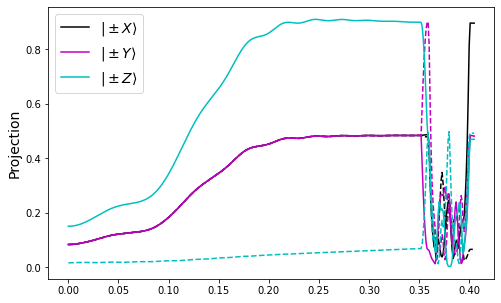

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(t * MHz, result.expect[0], color="black", label="$|\pm X \\rangle$")
plt.plot(t * MHz, result.expect[1], "--", color="black")
plt.plot(t * MHz, result.expect[2], color="m", label="$|\pm Y \\rangle$")
plt.plot(t * MHz, result.expect[3], "--", color="m")
plt.plot(t * MHz, result.expect[4], color="c", label="$|\pm Z \\rangle$")
plt.plot(t * MHz, result.expect[5], "--", color="c")

#plt.ylabel("Tr{$|C_\\alpha^+ \\rangle \langle C_\\alpha^+ | \\rho$}", fontsize=14)
plt.ylabel("Projection", fontsize=14)
plt.legend(fontsize=14)

# Bell state generation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

import sim_utils as su

MHz = su.MHz

In [17]:
kcq = su.KCQ(nqubits=2)

#kcq.add_entangling_gate()
#kcq.add_Z_gate(0)
#kcq.add_X_gate(np.pi, 0)
#kcq.add_identity_gate(0.1/MHz)

dt = 0.001 / MHz
t = np.arange(0., 10*kcq.t0, dt)

result = qt.mesolve(kcq.H, kcq.thermal_state(), t,
                    c_ops=kcq.loss_terms(),
                    e_ops=[psi * psi.dag() for psi in kcq.bell_states()],
                    options=qt.Options(store_states=False, store_final_state=True))

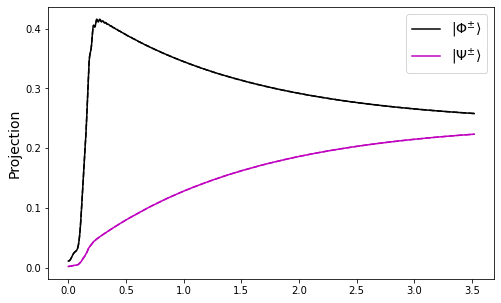

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(t * MHz, result.expect[0], color="black", label="$|\Phi^{\pm} \\rangle$")
plt.plot(t * MHz, result.expect[1], "--", color="black")
plt.plot(t * MHz, result.expect[2], color="m", label="$|\Psi^{\pm} \\rangle$")
plt.plot(t * MHz, result.expect[3], "--", color="m")
plt.ylabel("Projection", fontsize=14)
plt.legend(fontsize=14)